In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy.stats import norm
import random
import pandas as pd


### Exercise 1: Generate two 1D Gaussians (2 points)

Here, you will generate **1D Gaussian (normal) distributions** using NumPy, and then visualize them with histograms and density curves.  

**Your tasks:**
1. Generate two Gaussian-distributed datasets:
   - The first centered at **0** with variance **1** (standard normal).
   - The second centered at **5** with variance **1**.
   - Use about **1000 samples** for each.

This will help you see what it means for data to come from a *mixture of Gaussians*.


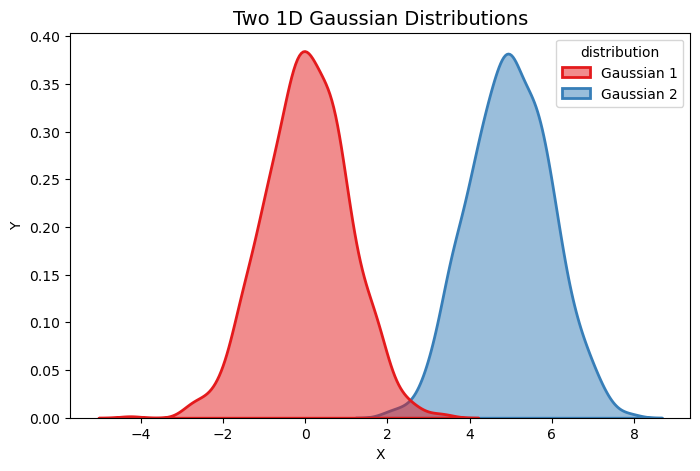

In [2]:
# ----------------------------
# TODO Generate 1D Gaussians
# ----------------------------

data1 = np.random.normal(loc=0, scale=1, size=1000)
data2 = np.random.normal(loc=5, scale=1, size=1000)

# ----------------------------
# Implementation Ends Here
# ----------------------------

df = pd.DataFrame({
    "value": np.concatenate([data1, data2]),
    "distribution": ["Gaussian 1"] * len(data1) + ["Gaussian 2"] * len(data2)
})

plt.figure(figsize=(8,5))
sns.kdeplot(
    data=df, 
    x="value", 
    hue="distribution",
    fill=True,       
    common_norm=False,
    alpha=0.5, 
    linewidth=2,
    palette="Set1"
)

plt.title("Two 1D Gaussian Distributions", fontsize=14)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



### Exercise 2: Generate two 2D Gaussians (2 points)

Now let’s move from **1D** to **2D** Gaussians.  
A 2D Gaussian distribution is defined by:  
- A **mean vector** (e.g., `[0, 0]`)  
- A **covariance matrix** (e.g., `[[1, 0], [0, 1]]`)  

**Your tasks:**
1. Generate two 2D Gaussian-distributed datasets using `np.random.multivariate_normal`.
   - First Gaussian: mean = `[0, 0]`, covariance = `[[1, 0.5], [0.5, 1]]`
   - Second Gaussian: mean = `[3, 3]`, covariance = `[[1, -0.3], [-0.3, 1]]`
   - Use about **500 samples** for each.

This will help you understand how clusters look in **2D Gaussian space**.


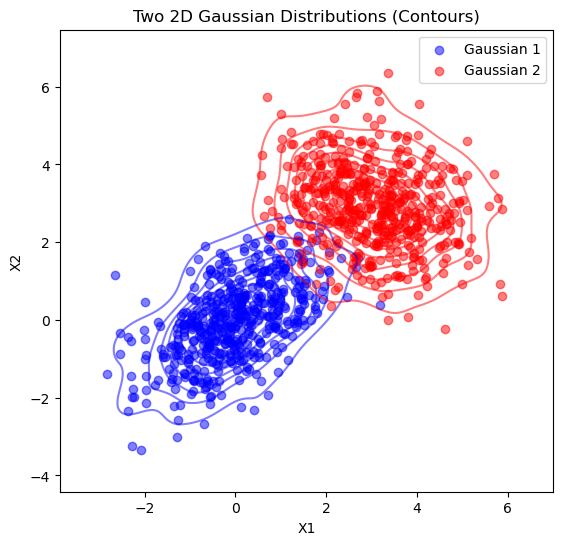

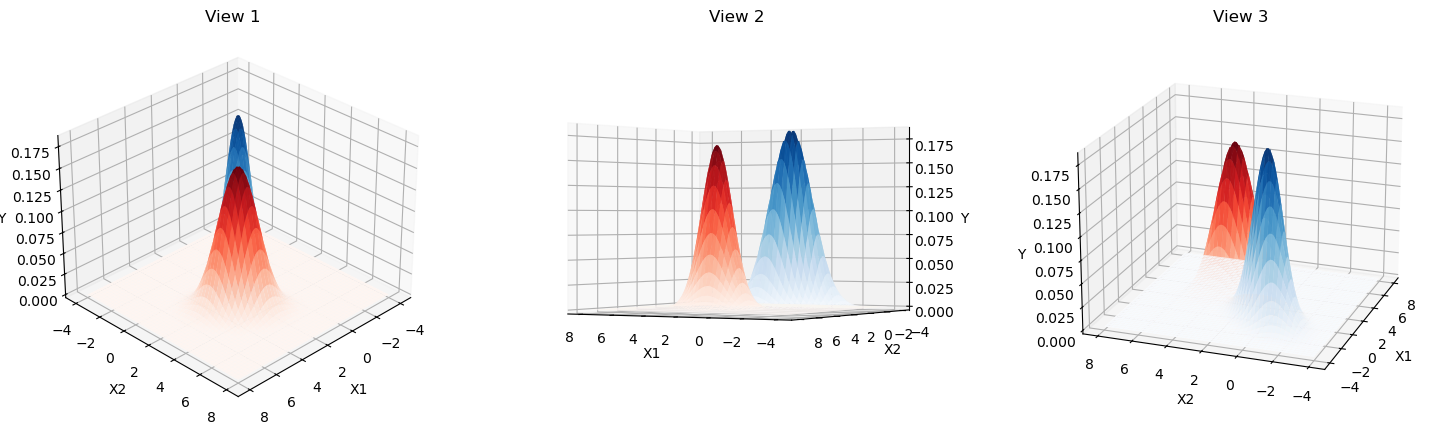

In [3]:
# ----------------------------
# TODO Generate 2D Gaussians
# ----------------------------

mean1 = [0, 0]
cov1 = [[1, 0.5], [0.5, 1]]
data1 = np.random.multivariate_normal(mean=mean1, cov=cov1, size=500)

mean2 = [3, 3]
cov2 = [[1, -0.3], [-0.3, 1]]
data2 = np.random.multivariate_normal(mean=mean2, cov=cov2, size=500)

# ----------------------------
# Implementation Ends Here
# ----------------------------

# ----------------------------
# 2D Density Surface
# ----------------------------

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(data1[:, 0], data1[:, 1], alpha=0.5, color='blue', label="Gaussian 1")
plt.scatter(data2[:, 0], data2[:, 1], alpha=0.5, color='red', label="Gaussian 2")

sns.kdeplot(x=data1[:,0], y=data1[:,1], levels=10, color='blue', alpha=0.5)
sns.kdeplot(x=data2[:,0], y=data2[:,1], levels=10, color='red', alpha=0.5)

plt.title("Two 2D Gaussian Distributions (Contours)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

# ----------------------------
# 3D Density Surface
# ----------------------------

x, y = np.meshgrid(np.linspace(-4, 8, 100), np.linspace(-4, 8, 100))
pos = np.dstack((x, y))

rv1 = multivariate_normal(mean1, cov1)
rv2 = multivariate_normal(mean2, cov2)

z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)

fig = plt.figure(figsize=(18, 6))

views = [(30, 45), (0, 120), (20, 200)]  
titles = ["View 1", "View 2", "View 3"]

for i, (elev, azim) in enumerate(views, 1):
    ax = fig.add_subplot(1, 3, i, projection="3d")
    ax.plot_surface(x, y, z1, cmap="Blues", linewidth=0, alpha=0.9)
    ax.plot_surface(x, y, z2, cmap="Reds", linewidth=0, alpha=0.9)

    ax.set_title(titles[i-1])
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("Y")
    ax.view_init(elev=elev, azim=azim)

plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.show()



### Exercise 3: Generate three 2D Gaussians (3 points)

Now let’s go one step further and generate **three 2D Gaussian distributions**.  
A 2D Gaussian distribution is defined by:  
- A **mean vector** (e.g., `[0, 0]`)  
- A **covariance matrix** (e.g., `[[1, 0], [0, 1]]`)  

**Your tasks:**  
1. Generate three 2D Gaussian-distributed datasets using `np.random.multivariate_normal`.  
   - First Gaussian: mean = `[0, 0]`, covariance = `[[1, 0.3], [0.3, 1]]`  
   - Second Gaussian: mean = `[4, 4]`, covariance = `[[1, -0.4], [-0.4, 1]]`  
   - Third Gaussian: mean = `[0, 5]`, covariance = `[[1, 0.2], [0.2, 1]]`  
   - Use about **500 samples** for each.  


This will give you an intuition for how **multiple Gaussian clusters overlap** in 2D space.


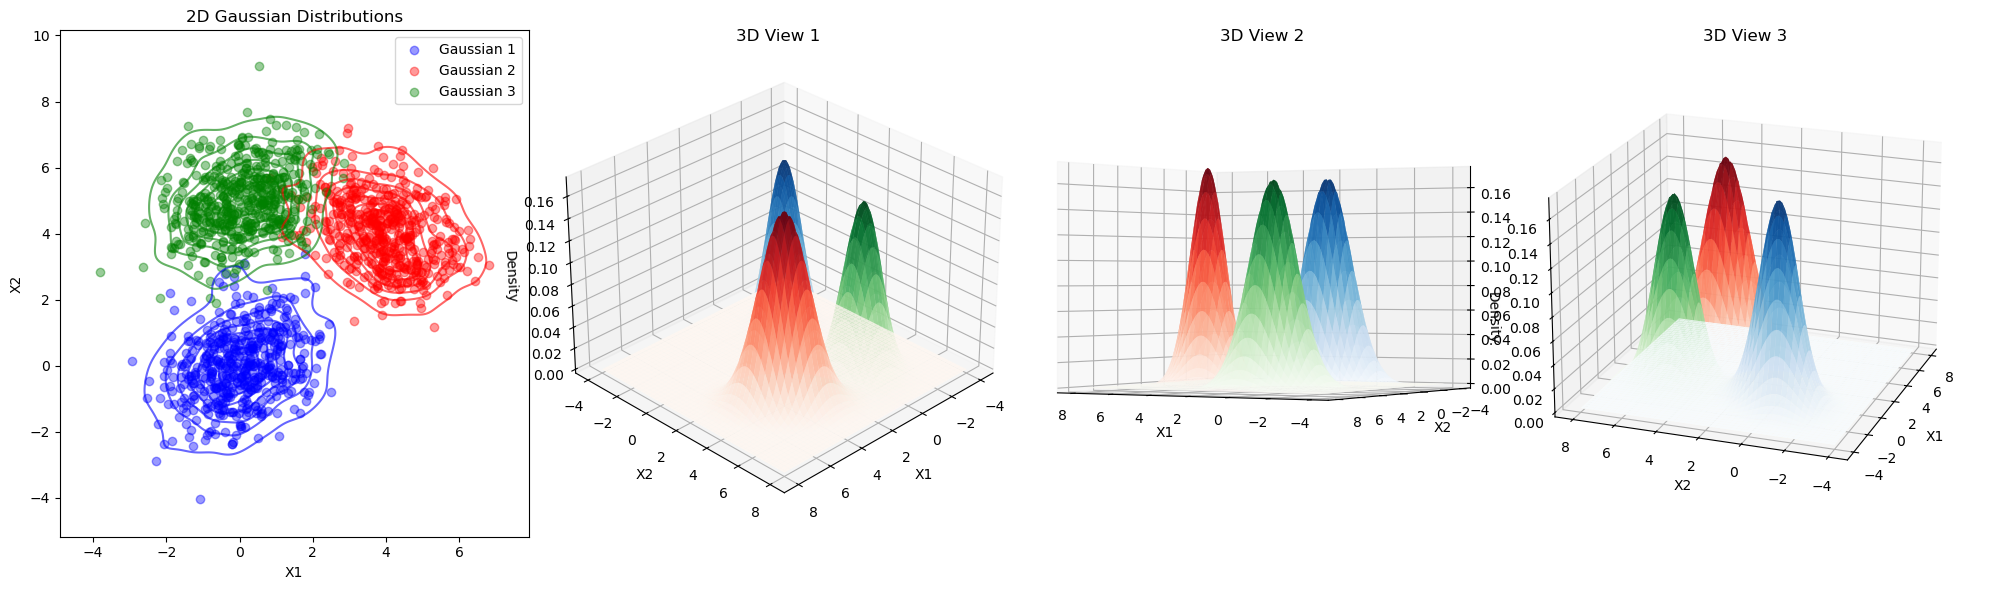

In [4]:
# ----------------------------
# TODO Generate 3 2D Gaussians
# ----------------------------
mean1 = [0, 0]
cov1 = [[1, 0.3], [0.3, 1]]

mean2 = [4, 4]
cov2 = [[1, -0.4], [-0.4, 1]]

mean3 = [0, 5]
cov3 = [[1, 0.2], [0.2, 1]]

data1 = np.random.multivariate_normal(mean=mean1, cov=cov1, size=500)
data2 = np.random.multivariate_normal(mean=mean2, cov=cov2, size=500)
data3 = np.random.multivariate_normal(mean=mean3, cov=cov3, size=500)

# ----------------------------
# Implementation Ends Here
# ----------------------------
fig = plt.figure(figsize=(20, 6))

# --- Subplot 1: 2D scatter + KDE contours ---
ax1 = fig.add_subplot(1, 4, 1)
ax1.scatter(data1[:, 0], data1[:, 1], alpha=0.4, color="blue", label="Gaussian 1")
ax1.scatter(data2[:, 0], data2[:, 1], alpha=0.4, color="red", label="Gaussian 2")
ax1.scatter(data3[:, 0], data3[:, 1], alpha=0.4, color="green", label="Gaussian 3")

sns.kdeplot(x=data1[:, 0], y=data1[:, 1], levels=8, color="blue", alpha=0.6, ax=ax1)
sns.kdeplot(x=data2[:, 0], y=data2[:, 1], levels=8, color="red", alpha=0.6, ax=ax1)
sns.kdeplot(x=data3[:, 0], y=data3[:, 1], levels=8, color="green", alpha=0.6, ax=ax1)

ax1.set_title("2D Gaussian Distributions")
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.legend()

# --- Setup for 3D PDFs ---
x, y = np.meshgrid(np.linspace(-4, 8, 100), np.linspace(-4, 8, 100))
pos = np.dstack((x, y))

rv1 = multivariate_normal(mean1, cov1)
rv2 = multivariate_normal(mean2, cov2)
rv3 = multivariate_normal(mean3, cov3)

z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)
z3 = rv3.pdf(pos)

# --- Subplots 2-4: Three 3D views ---
views = [(30, 45), (0, 120), (20, 200)]
titles = ["3D View 1", "3D View 2", "3D View 3"]

for i, (view, title) in enumerate(zip(views, titles), start=2):
    ax = fig.add_subplot(1, 4, i, projection="3d")
    ax.plot_surface(x, y, z1, cmap="Blues", linewidth=0, alpha=0.8)
    ax.plot_surface(x, y, z2, cmap="Reds", linewidth=0, alpha=0.8)
    ax.plot_surface(x, y, z3, cmap="Greens", linewidth=0, alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("Density")
    ax.view_init(elev=view[0], azim=view[1])

plt.tight_layout()
plt.show()


### Exercise 4: Train a Gaussian Mixture Model (GMM) using Expectation–Maximization (8 points)

Now that you have generated three Gaussian distributions, let’s fit a **Gaussian Mixture Model (GMM)** to the data.  
We will implement the **Expectation–Maximization (EM)** algorithm manually to show all steps:  

1. **Initialization**  
   - Randomly initialize the means, variances, and mixture weights (π).  

2. **E-step**  
   - Compute the "responsibilities", i.e., the probability that each point belongs to each Gaussian.  

3. **M-step**  
   - Update the means, covariances, and mixture weights using the responsibilities.  

4. **Iterate** until convergence (or fixed number of steps).  

This process maximizes the **likelihood** of the data under the mixture model.  

Your tasks:  
- Initialize Means, Covariances and weights.  
- Implement the **E-step** and **M-step** functions.  
- Train the model for ~20 iterations.  


---

### Step 1: Random Initialization (2 points)

Before running the **Expectation–Maximization (EM)** algorithm, we need to **initialize the parameters** of our Gaussian Mixture Model (GMM).  
Remember, GMM has three types of parameters:  

- **Means (μ):** the center of each Gaussian cluster  
- **Covariance matrices (Σ):** the spread/shape of each Gaussian  
- **Weights (π):** the mixing proportions of each cluster  

**Your task:**  
1. Randomly pick **K points** from the dataset `X` as the initial means.  
   - Hint: use `np.random.choice`.  
2. Initialize each covariance matrix as the **overall covariance of the dataset**.  
   - Hint: use `np.cov(X, rowvar=False)`.  
3. Initialize the weights to be **equal** (e.g., `1/K` for each cluster).  


---


In [29]:
from scipy.stats import multivariate_normal

# Stack all three distributions into one dataset
X = np.vstack([data1, data2, data3])
np.random.seed(42)

# ----------------------------
# TODO: Random Initialization 
# ----------------------------
K = 3

means_init = X[np.random.choice(X.shape[0], K, replace=False)]
covs_init = np.array([np.cov(X, rowvar=False)] * K)
weights_init = np.ones(K) / K

# ----------------------------
# Implementation Ends Here
# ----------------------------

print("Initial Means:\n", means_init)

Initial Means:
 [[-3.81213523  2.84408424]
 [ 0.19851686  6.14425553]
 [ 1.71047666 -0.07909916]]


---

### Step 2: Expectation Step (E-step) (3 points)

In the **E-step**, we compute the **responsibilities** — the probabilities that each data point belongs to each Gaussian cluster, given the current parameters.  

Mathematically, for each point $x_i$ and cluster $k$:  

$$
r_{ik} = \frac{\pi_k \, \mathcal{N}(x_i \mid \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \, \mathcal{N}(x_i \mid \mu_j, \Sigma_j)}
$$

Where:  
- $\pi_k$ = weight of cluster $k$  
- $\mu_k, \Sigma_k$ = mean and covariance of cluster $k$  
- $\mathcal{N}(x_i \mid \mu_k, \Sigma_k)$ = Gaussian PDF  

**Your task:**  
1. For each cluster $k$, compute the Gaussian PDF values for all data points.  
   - Hint: use `scipy.stats.multivariate_normal.pdf`.  
2. Multiply each PDF by the corresponding cluster weight $\pi_k$.  

The output should be an **$N \times K$ matrix** of responsibilities.  

---


In [30]:

def e_step(X, means, covariances, weights):



    N, D = X.shape
    K = len(means)
    resp = np.zeros((N, K))
    for k in range(K):
        # ----------------------------
        # TODO: Implement Expectation Step 
        # ----------------------------
        rv = multivariate_normal(mean=means[k], cov=covariances[k])
        resp[:, k] = weights[k] * rv.pdf(X)

        # ----------------------------
        # Implementation Ends Here
        # ----------------------------
    resp /= resp.sum(axis=1, keepdims=True)

    return resp



---

### Step 3: Maximization Step (M-step) (3 points)

In the **M-step**, we update the parameters of our Gaussian Mixture Model (means, covariances, and weights) using the responsibilities $r_{ik}$ from the E-step.  

#### Parameter updates:

- **Effective number of points assigned to cluster $k$:**
$$
N_k = \sum_{i=1}^N r_{ik}
$$

- **Updated means:**
$$
\mu_k = \frac{1}{N_k} \sum_{i=1}^N r_{ik} x_i
$$

- **Updated covariance matrices:**
$$
\Sigma_k = \frac{1}{N_k} \sum_{i=1}^N r_{ik} (x_i - \mu_k)(x_i - \mu_k)^T
$$

- **Updated weights:**
$$
\pi_k = \frac{N_k}{N}
$$

#### Your task:

1. Use $N_k$ to update the **means**.  
2. Update the **covariance matrices** by weighting squared deviations.  



---


In [31]:


def m_step(X, resp):

    N, D = X.shape
    K = resp.shape[1]
    Nk = resp.sum(axis=0)  
    means = np.dot(resp.T, X) / Nk[:, np.newaxis]
    covariances = []
    for k in range(K):
        # ----------------------------
        # TODO: Implement Maximization Step
        # ----------------------------
        diff = X - means[k]
        cov_k = np.dot(resp[:, k] * diff.T, diff) / Nk[k]
        covariances.append(cov_k)
        
        # ----------------------------
        # Implementation Ends Here
        # ----------------------------
    weights = Nk / N



    return means, covariances, weights




---

### Step 4: Train GMM with Expectation-Maximization (4 points)

Now that we have implemented the **E-step** and **M-step**, we can put everything together into a training loop.

The EM algorithm iteratively refines the parameters until convergence:

1. **E-step:**  
   Compute the responsibilities $r_{ik}$ given the current parameters.

2. **M-step:**  
   Update the means, covariances, and weights using the formulas from Step 3.

3. **Repeat:**  
   Run E-step and M-step in a loop until convergence (or for a fixed number of iterations).

---

#### Your task:
- Complete the training loop for **n_iters** iterations:
  - Call `e_step` to compute responsibilities.  
  - Call `m_step` to update the parameters.  

At the end, the function should return the **final means, covariances, and weights** of the trained GMM.

---


In [44]:

def train_gmm(X, means, covariances, weights, n_iters=20):
    """
    Train a Gaussian Mixture Model using EM.
    
    Parameters:
        X : (n_samples, n_features) dataset
        means, covariances, weights : initialized parameters
        n_iters : number of iterations

    Returns:
        means, covariances, weights
    """
    # ----------------------------
    # TODO: Implement GMM Training (EM algorithm)
    # ----------------------------
    for i in range(n_iters):
        resp = e_step(X, means, covariances, weights)
        means, covariances, weights = m_step(X, resp)

   
    # ----------------------------
    # Implementation Ends Here
    # ----------------------------
    return means, covariances, weights


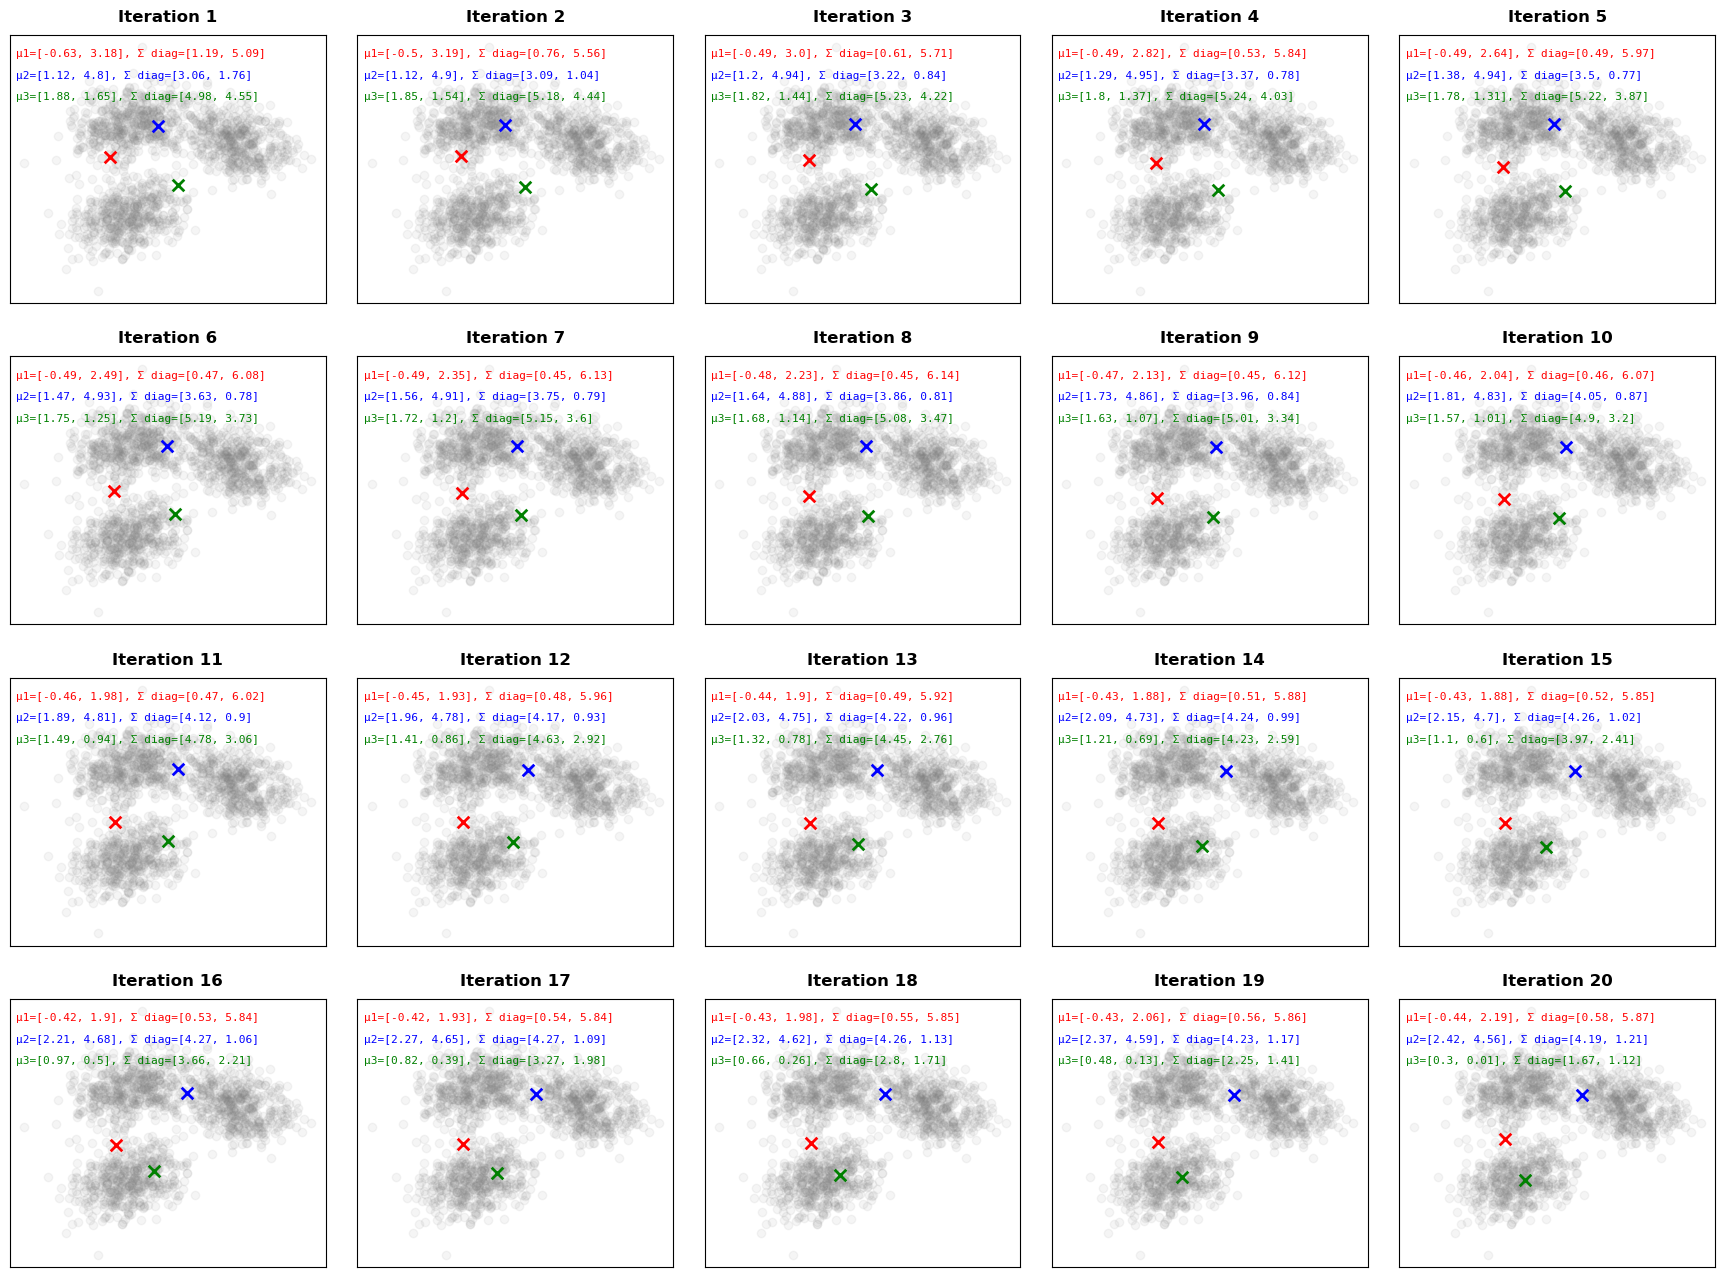

In [45]:
# ----------------------------
# Visualization function
# ----------------------------
def visualize_training(X, K=3, n_iters=20):
    np.random.seed(42)
    means = X[np.random.choice(len(X), K, replace=False)]
    covariances = [np.cov(X, rowvar=False)] * K
    weights = np.ones(K) / K
    
    colors = ["red", "blue", "green"]  
    
    fig, axes = plt.subplots(4, 5, figsize=(22, 16))
    plt.subplots_adjust(wspace=0.1, hspace=0.2)
    axes = axes.flatten()
    
    for i in range(n_iters):
        resp = e_step(X, means, covariances, weights)
        means, covariances, weights = m_step(X, resp)
        
        ax = axes[i]
        ax.scatter(X[:,0], X[:,1], alpha=0.08, color="gray")
        

        for k, color in enumerate(colors[:K]):
            ax.scatter(means[k,0], means[k,1], c=color, marker="x", s=70, linewidth=2)
            
            mu_str = np.round(means[k], 2)
            cov_diag = np.round(np.diag(covariances[k]), 2)
            ax.text(
                0.02, 0.95 - 0.08*k,   
                f"μ{k+1}={mu_str.tolist()}, Σ diag={cov_diag.tolist()}",
                transform=ax.transAxes,
                fontsize=8, color=color, ha="left", va="top", family="monospace"
            )
        
        ax.set_title(f"Iteration {i+1}", fontsize=12, fontweight="bold", pad=10)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()


# ----------------------------
# Run visualization
# ----------------------------
final_means, final_covs, final_weights = train_gmm(X, means_init, covs_init, weights_init, n_iters=20)
visualize_training(X, K=3, n_iters=20)


## Exercise 5: Behavior of Gaussian Mixture Models (2 points)

In this exercise, instead of implementing EM from scratch, we will use **Scikit-learn’s `GaussianMixture`** class.

### How to use the GMM Library
1. Import and create a model:
   ```python
   from sklearn.mixture import GaussianMixture
   gmm = GaussianMixture(n_components=2, covariance_type="full", random_state=42)

### Means and Covariances Used

We test GMM under different scenarios by **changing the means and covariances** of two Gaussians:

- **Scenario 1:** Well-separated clusters with equal variances *(easy case)*.  
- **Scenario 2:** Overlapping clusters where one has larger variance.  
- **Scenario 3:** Both Gaussians have the same mean but very different variances.  

These examples illustrate how GMM fits data under varying conditions.


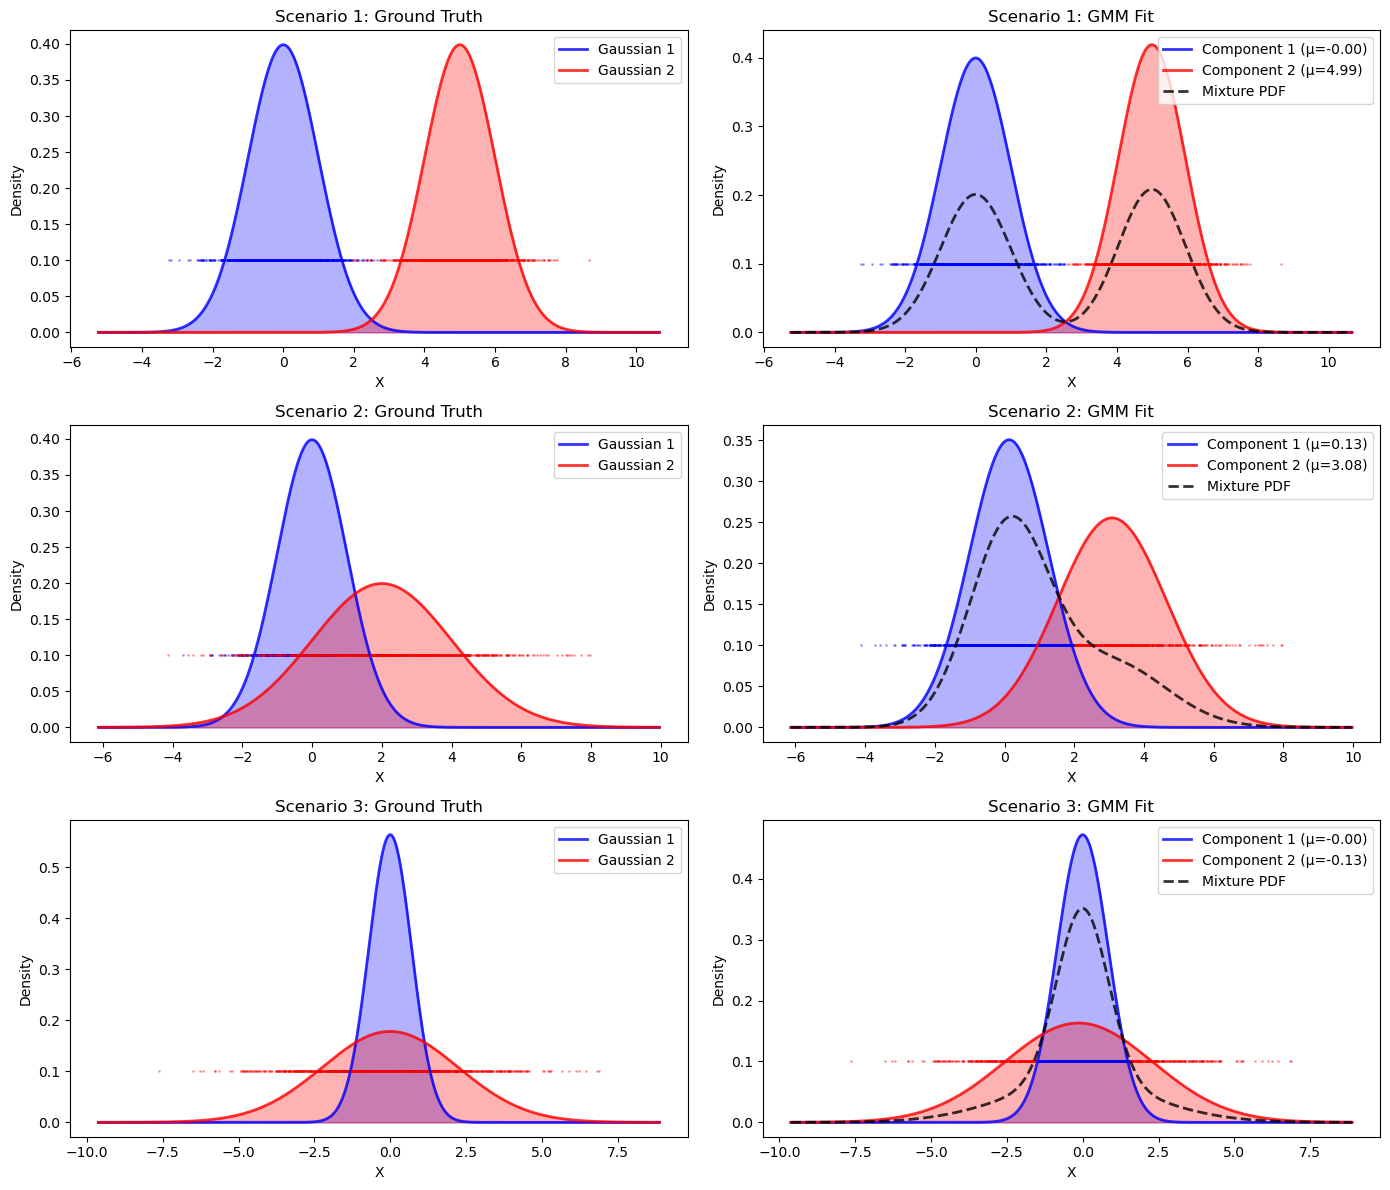

In [40]:
# ----------------------------
# Limitations of GMM on 1D Gaussians
# ----------------------------
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

scenarios = [
    (0, 1, 5, 1),    # Case 1: equal variance, well separated
    (0, 1, 2, 4),    # Case 2: overlap + different spread
    (0, 0.5, 0, 5)   # Case 3: same mean, very different variances
]

fig, axes = plt.subplots(len(scenarios), 2, figsize=(14, 4*len(scenarios)))

for i, (m1, v1, m2, v2) in enumerate(scenarios):
    # Generate data
    data1 = np.random.normal(loc=m1, scale=np.sqrt(v1), size=1000)
    data2 = np.random.normal(loc=m2, scale=np.sqrt(v2), size=1000)
    X_ex = np.concatenate([data1, data2])[:, None]  
    df_ex = pd.DataFrame({
        "value": np.concatenate([data1, data2]),
        "distribution": ["Gaussian 1"]*len(data1) + ["Gaussian 2"]*len(data2)
    })
    
    # Plot ground truth PDFs
    x_range = np.linspace(X_ex.min()-2, X_ex.max()+2, 1000)
    pdf1 = norm.pdf(x_range, loc=m1, scale=np.sqrt(v1))
    pdf2 = norm.pdf(x_range, loc=m2, scale=np.sqrt(v2))
    
    axes[i,0].plot(x_range, pdf1, 'b-', linewidth=2, label='Gaussian 1', alpha=0.8)
    axes[i,0].plot(x_range, pdf2, 'r-', linewidth=2, label='Gaussian 2', alpha=0.8)
    axes[i,0].fill_between(x_range, pdf1, alpha=0.3, color='blue')
    axes[i,0].fill_between(x_range, pdf2, alpha=0.3, color='red')
    
    # Add data points as scatter plot
    axes[i,0].scatter(data1, np.zeros_like(data1) + 0.1, alpha=0.3, s=1, color='blue')
    axes[i,0].scatter(data2, np.zeros_like(data2) + 0.1, alpha=0.3, s=1, color='red')
    
    axes[i,0].set_title(f"Scenario {i+1}: Ground Truth")
    axes[i,0].set_xlabel("X")
    axes[i,0].set_ylabel("Density")
    axes[i,0].legend()
    
    # ----------------------------
    # TODO: SKlearn GMM training 
    # ----------------------------
    gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
    gmm.fit(X_ex)
    labels = gmm.predict(X_ex)
    # ----------------------------
    # Implementation ends here
    # ----------------------------

    # Plot GMM learned PDFs
    # Get learned parameters
    means_learned = gmm.means_.flatten()
    covariances_learned = gmm.covariances_.flatten()
    weights_learned = gmm.weights_
    
    # Plot individual component PDFs
    pdf1_learned = norm.pdf(x_range, loc=means_learned[0], scale=np.sqrt(covariances_learned[0]))
    pdf2_learned = norm.pdf(x_range, loc=means_learned[1], scale=np.sqrt(covariances_learned[1]))
    
    # Weighted mixture PDF
    mixture_pdf = weights_learned[0] * pdf1_learned + weights_learned[1] * pdf2_learned
    
    axes[i,1].plot(x_range, pdf1_learned, 'b-', linewidth=2, label=f'Component 1 (μ={means_learned[0]:.2f})', alpha=0.8)
    axes[i,1].plot(x_range, pdf2_learned, 'r-', linewidth=2, label=f'Component 2 (μ={means_learned[1]:.2f})', alpha=0.8)
    axes[i,1].plot(x_range, mixture_pdf, 'k--', linewidth=2, label='Mixture PDF', alpha=0.8)
    axes[i,1].fill_between(x_range, pdf1_learned, alpha=0.3, color='blue')
    axes[i,1].fill_between(x_range, pdf2_learned, alpha=0.3, color='red')
    
    # Add data points colored by cluster assignment
    cluster1_data = X_ex[labels == 0].flatten()
    cluster2_data = X_ex[labels == 1].flatten()
    
    axes[i,1].scatter(cluster1_data, np.zeros_like(cluster1_data) + 0.1, alpha=0.3, s=1, color='blue')
    axes[i,1].scatter(cluster2_data, np.zeros_like(cluster2_data) + 0.1, alpha=0.3, s=1, color='red')
    
    axes[i,1].set_title(f"Scenario {i+1}: GMM Fit")
    axes[i,1].set_xlabel("X")
    axes[i,1].set_ylabel("Density")
    axes[i,1].legend()

plt.tight_layout()
plt.show()


---

### Questions (6 points)

1. **Model Parameters:**  
   - What are the **final means and covariance matrices** that the model converged to?  
   - Do they align well with the Gaussian clusters you originally generated?  

   **Answer:**
   - means:
      - [-0.44, 2.19], [2.42, 4.56], [0.3, 0.01]
   - covariances:  
      - [[1, 0.58], [5.87,1]], [[1, 4.19], [1.21, 1]], [[1, 1.67], [1.12]]

   Comparing these to the original clusters:
   - Original means were approximately at [0,0], [4,4], and [0,5].
   - The learned means are reasonably close, indicating that the GMM has effectively captured the underlying structure of the data.
   - The original covariance matrices were:
       - [[1, 0.3], [0.3, 1]], [[1, -0.4], [-0.4, 1]], [[1, 0.2], [0.2, 1]]
   - The learned covariances show a lot more differences than the means.

---

2. **Longer Training (40 steps):**  
   - What do you think would happen if we ran the EM algorithm for **40 steps** instead of 20?  

   **Answer:**  
   - Running the EM algorithm for 40 steps would likely lead to further refinement of the model parameters, potentially resulting in more accurate estimates of the means and covariances. However, it is also possible that after a certain number of iterations, the parameters may stabilize and additional iterations may yield diminishing returns in terms of improvement.

---

3. **Early Stopping (10 steps):**  
   - What would have happened if we had stopped after **10 steps**? Would the model have converged?  

   **Answer:**  
   - Visually inspecting the plot after 10 iterations, it appears that the model has not fully converged yet. The means and covariances were still adjusting in subsequent iterations. Therefore, stopping at 10 steps would likely result in suboptimal parameter estimates, and the model may not have accurately captured the underlying data distribution.

---
4. **GMM with same means with different variance:**  
   - In Scenario 3 of the Exercise 5, both the gaussians have same means but different variance. Why can GMM separate two components even though they share the same mean?

   **Answer:**  
   - GMM can separate two overlapping components (same means but different variances) because it uses probability distributions to model the data. If the variances are sufficiently different, the likelihood of data points under each Gaussian will differ, allowing the model to assign points to the correct component based on their spread and density, even if they share the same mean. However, this is predicated upon having enough data points and a significant difference in variances; otherwise, the model may struggle to distinguish between the components.
   

---
